In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime, timedelta
from astropy.time import Time

import os

from pysr import PySRRegressor

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
input_ch_path = "E:\Research\SR\input\CH_Indices"
input_mag_path = "E:\Research\SR\input\mag_Indices"
output_path = "E:\Research\SR\output"

# input
mag_indics_r5_0  = pd.read_csv(input_mag_path+"\mag_indices_R5_0.csv")   # dataframe
mag_indics_r21_5 = pd.read_csv(input_mag_path+"\mag_indices_R21_5.csv")  # dataframe

CH_indics_193 = pd.read_csv(input_ch_path+"\CH_Indics_193.csv")    # dataframe
CH_indics_211 = pd.read_csv(input_ch_path+"\CH_Indics_211.csv")    # dataframe

# output
omni_speed = pd.DataFrame(columns=['datetime', 'speed'])        # dataframe
rows = []

with open(output_path + "\omni2_2000-2024.lst") as f:
    for line in f:
        year, doy, hour, speed = line.strip().split()
        year, doy, hour, speed = int(year), int(doy), int(hour), float(speed)
        
        if (year >= 2012) and (hour in (0, 12)):
            dt = datetime(year, 1, 1) + timedelta(days=doy-1, hours=hour)
            dt = dt.strftime("%Y-%m-%dT%H:%M:%S")
            rows.append({"datetime": dt, "speed": speed})

omni_speed = pd.DataFrame(rows, columns=["datetime", "speed"])

In [3]:
omni_speed

,datetime,speed
0,2012-01-01T00:00:00,379.0
1,2012-01-01T12:00:00,366.0
2,2012-01-02T00:00:00,359.0
3,2012-01-02T12:00:00,347.0
4,2012-01-03T00:00:00,403.0
...,...,...
9493,2024-12-29T12:00:00,335.0
9494,2024-12-30T00:00:00,365.0
9495,2024-12-30T12:00:00,341.0
9496,2024-12-31T00:00:00,313.0


In [4]:
SR_df = pd.DataFrame({
    'datetime':         omni_speed['datetime'],
    'speed':            omni_speed['speed'],

    # Magnetic field indices
    # R5_0
    'f_s_R5_0':         mag_indics_r5_0['expansion_factor'].shift(6),
    'D_ch_R5_0':        mag_indics_r5_0['coronal_hole_dist'].shift(6),
    'Q_R5_0':           mag_indics_r5_0['squashing_factor'].shift(6),

    # R21_5
    'f_s_R21_5':        mag_indics_r21_5['expansion_factor'].shift(6),
    'D_ch_R21_5':       mag_indics_r21_5['coronal_hole_dist'].shift(6),
    'Q_R21_5':          mag_indics_r21_5['squashing_factor'].shift(6),

    # Coronal hole indices
    # EUV 193
    'A_CH_193_lag3':    CH_indics_193['A_CH'].shift(6),
    #'A_CH_193_lag3p5':  CH_indics_193['A_CH'].shift(7),
    'A_CH_193_lag4':    CH_indics_193['A_CH'].shift(8),
    #'A_CH_193_lag4p5':  CH_indics_193['A_CH'].shift(9),
    'A_CH_193_lag5':    CH_indics_193['A_CH'].shift(10),

    'P_CH30_193_lag3':    CH_indics_193['P_CH30'].shift(6),
    #'P_CH30_193_lag3p5':  CH_indics_193['P_CH30'].shift(7),
    'P_CH30_193_lag4':    CH_indics_193['P_CH30'].shift(8),
    #'P_CH30_193_lag4p5':  CH_indics_193['P_CH30'].shift(9),
    'P_CH30_193_lag5':    CH_indics_193['P_CH30'].shift(10),

    'P_CH90_193_lag3':    CH_indics_193['P_CH90'].shift(6),
    #'P_CH90_193_lag3p5':  CH_indics_193['P_CH90'].shift(7),
    'P_CH90_193_lag4':    CH_indics_193['P_CH90'].shift(8),
    #'P_CH90_193_lag4p5':  CH_indics_193['P_CH90'].shift(9),
    'P_CH90_193_lag5':    CH_indics_193['P_CH90'].shift(10),

    # EUV 211 
    'A_CH_211_lag3':    CH_indics_211['A_CH'].shift(6),
    #'A_CH_211_lag3p5':  CH_indics_211['A_CH'].shift(7),
    'A_CH_211_lag4':    CH_indics_211['A_CH'].shift(8),
    #'A_CH_211_lag4p5':  CH_indics_211['A_CH'].shift(9),
    'A_CH_211_lag5':    CH_indics_211['A_CH'].shift(10),

    'P_CH30_211_lag3':    CH_indics_211['P_CH30'].shift(6),
    #'P_CH30_211_lag3p5':  CH_indics_211['P_CH30'].shift(7),
    'P_CH30_211_lag4':    CH_indics_211['P_CH30'].shift(8),
    #'P_CH30_211_lag4p5':  CH_indics_211['P_CH30'].shift(9),
    'P_CH30_211_lag5':    CH_indics_211['P_CH30'].shift(10),

    'P_CH90_211_lag3':    CH_indics_211['P_CH90'].shift(6),
    #'P_CH90_211_lag3p5':  CH_indics_211['P_CH90'].shift(7),
    'P_CH90_211_lag4':    CH_indics_211['P_CH90'].shift(8),
    #'P_CH90_211_lag4p5':  CH_indics_211['P_CH90'].shift(9),
    'P_CH90_211_lag5':    CH_indics_211['P_CH90'].shift(10)
    })

In [5]:
SR_df

,datetime,speed,f_s_R5_0,D_ch_R5_0,Q_R5_0,f_s_R21_5,D_ch_R21_5,Q_R21_5,A_CH_193_lag3,A_CH_193_lag4,...,P_CH90_193_lag5,A_CH_211_lag3,A_CH_211_lag4,A_CH_211_lag5,P_CH30_211_lag3,P_CH30_211_lag4,P_CH30_211_lag5,P_CH90_211_lag3,P_CH90_211_lag4,P_CH90_211_lag5
0,2012-01-01T00:00:00,379.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012-01-01T12:00:00,366.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012-01-02T00:00:00,359.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-01-02T12:00:00,347.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012-01-03T00:00:00,403.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,2024-12-29T12:00:00,335.0,18.5773,2.9523,-0.4037,18.5773,2.9523,-0.4037,0.00000,0.002418,...,5077.801953,0.00000,0.002418,0.002744,5143.805153,5380.355625,6132.148550,13061.27459,13355.93581,14812.58159
9494,2024-12-30T00:00:00,365.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000397,...,5265.074600,0.00000,0.000397,0.001910,5226.832649,6762.748545,5974.310436,12649.52370,15096.39266,14837.83137
9495,2024-12-30T12:00:00,341.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00000,0.000000,...,5238.952330,0.00000,0.000000,0.002418,5511.430418,5143.805153,5380.355625,12533.78750,13061.27459,13355.93581
9496,2024-12-31T00:00:00,313.0,NaN,NaN,NaN,NaN,NaN,NaN,0.00002,0.000000,...,5814.816902,0.00002,0.000000,0.000397,5365.876974,5226.832649,6762.748545,12467.03808,12649.52370,15096.39266


In [44]:
modified_SR_df = SR_df.dropna(axis=0, how='any').reset_index(drop=True)
modified_SR_df = modified_SR_df[modified_SR_df['speed'] < 2000].reset_index(drop=True)

modified_SR_df = modified_SR_df[modified_SR_df['f_s_R5_0'] < 5000].reset_index(drop=True)


base_path = "E:\Research\SR\input"
os.makedirs(base_path, exist_ok=True) 

modified_SR_df.to_csv(os.path.join(base_path, "modified_SR_data.csv"),  index=False)

modified_SR_df

,datetime,speed,f_s_R5_0,D_ch_R5_0,Q_R5_0,f_s_R21_5,D_ch_R21_5,Q_R21_5,A_CH_193_lag3,A_CH_193_lag4,...,P_CH90_193_lag5,A_CH_211_lag3,A_CH_211_lag4,A_CH_211_lag5,P_CH30_211_lag3,P_CH30_211_lag4,P_CH30_211_lag5,P_CH90_211_lag3,P_CH90_211_lag4,P_CH90_211_lag5
0,2012-01-06T00:00:00,356.0,21.2332,1.66690,0.90650,21.2332,1.66690,0.90650,0.123612,0.015537,...,9053.077741,0.123612,0.015537,0.033738,14332.155340,12024.708710,13243.300420,26181.79511,23523.79528,30424.58199
1,2012-01-12T00:00:00,453.0,50.3692,2.34120,-1.96810,50.3692,2.34120,-1.96810,0.058503,0.001980,...,12245.745690,0.058503,0.001980,0.014814,21820.492120,23375.309570,23898.782900,34788.60232,40236.36109,39807.70270
2,2012-01-13T00:00:00,500.0,48.7145,2.44270,-1.83060,48.7145,2.44270,-1.83060,0.033180,0.058503,...,13042.469500,0.033180,0.058503,0.001980,21529.639800,21820.492120,23375.309570,35759.58432,34788.60232,40236.36109
3,2012-01-13T12:00:00,492.0,64.1492,2.67310,-0.98520,64.1492,2.67310,-0.98520,0.001977,0.075712,...,11325.521730,0.001977,0.075712,0.016851,19348.344400,22301.486480,20310.472830,32366.51087,35981.28608,34349.33992
4,2012-01-14T00:00:00,445.0,42.8676,2.98485,-1.43155,42.8676,2.98485,-1.43155,0.001368,0.033180,...,11295.200610,0.001368,0.033180,0.058503,23634.800740,21529.639800,21820.492120,35374.46089,35759.58432,34788.60232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3129,2024-12-21T00:00:00,463.0,20.4093,3.76520,-0.73960,20.4093,3.76520,-0.73960,0.057616,0.159849,...,8486.704112,0.057616,0.159848,0.174481,9463.969000,10637.414480,13880.623770,19995.22306,19253.07581,22150.93859
3130,2024-12-22T12:00:00,611.0,22.7287,2.82230,-0.90580,22.7287,2.82230,-0.90580,0.187762,0.043675,...,7929.952999,0.187762,0.043675,0.124007,14201.040190,10166.338470,9493.626967,22494.49768,19988.17818,19538.40701
3131,2024-12-27T00:00:00,351.0,44.3430,2.80890,-0.88845,44.3430,2.80890,-0.88845,0.006150,0.095963,...,5925.632777,0.006150,0.095963,0.045775,6047.645615,8370.899656,8010.815543,15461.07349,19594.66357,17033.53374
3132,2024-12-29T00:00:00,343.0,33.9880,2.61190,-0.83210,33.9880,2.61190,-0.83210,0.000397,0.001910,...,5106.270358,0.000397,0.001910,0.006150,6762.748545,5974.310436,6047.645615,15096.39266,14837.83137,15461.07349


---

### Run

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

input_cols = modified_SR_df.columns[2:].tolist()

X_train, X_val, y_train, y_val = train_test_split(
    modified_SR_df[input_cols], modified_SR_df['speed'],
    test_size=0.2, shuffle=False,
)

scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_val_s   = scaler.transform(X_val)

In [ ]:
binary_ops = ["+", "-", "*", "/", "pow"]
unary_ops  = ["inv", "log", "exp", "sqrt"]

model = PySRRegressor(
    niterations=100,
    population_size=1000,
    populations=20,
    binary_operators=binary_ops,
    unary_operators=unary_ops,
    maxsize=30,
    select_k_features=0,
    model_selection="best",
    random_state=0,
)

model.fit(X_train_s, y_train, variable_names=input_cols)

C:\Users\AHN\anaconda3\envs\venv\Lib\site-packages\pysr\sr.py:2776: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
Compiling Julia backend...
C:\Users\AHN\anaconda3\envs\venv\Lib\site-packages\pysr\sr.py:1850: UserWarning: Note: Setting `random_state` without also setting `deterministic=True` and `parallelism='serial'` will result in non-deterministic searches.
  warnings.warn(
C:\Users\AHN\anaconda3\envs\venv\Lib\site-packages\pysr\sr.py:89: UserWarning: You are using the `^` operator, but have not set up `constraints` for it. This may lead to overly complex expressions. One typical constraint is to use `constraints={..., '^': (-1, 1)}`, which will allow arbitrary-complexity base (-1) but only powers such as a constant or variable (1). For more tips, please see https://ai.damtp.cam.ac.uk/pysr/tuning/
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 0.000e+00
Progress: 0 / 2000 total iterations (0.000%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
───────────────────────────────────────────────────────────────────────────────────────────────────
════════════════════════════════════════════════════════════════════════════════════════════════════
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.160e+04
Progress: 11 / 2000 total iterations (0.550%)
════════════════════════════════════════════════════════════════════════════════════════════════════
───────────────────────────────────────────────────────────────────────────────────────────────────
Complexity  Loss       Score      Equation
1           8.435e+03  1.594e+01  y = 418.16
3           8.434e+03  4.238e-05 

In [10]:
# Pareto 최적 해 집합 보기
print(model)

# 가장 간단한 식 가져오기
best = model.get_best()
print("Best equation:\n", best['equation'])

PySRRegressor.equations_ = None


AttributeError: 'NoneType' object has no attribute 'loc'

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

---

Text(0, 0.5, 'Observed Speed (km/s)')

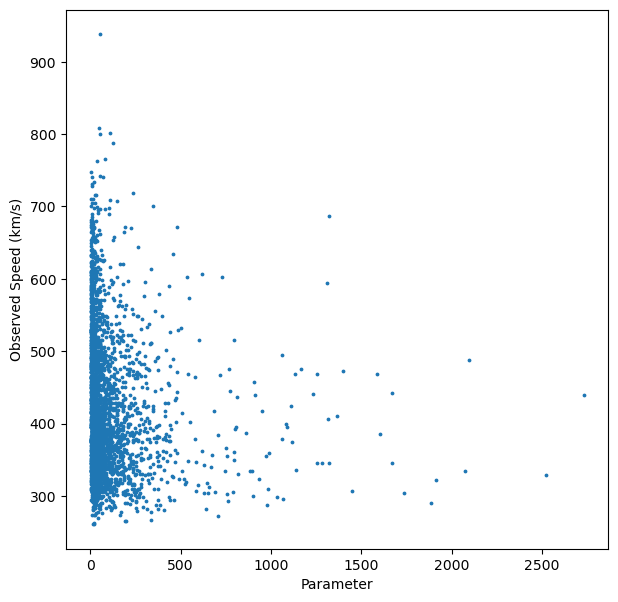

In [47]:
X = modified_SR_df['f_s_R21_5']
target_speed = modified_SR_df['speed']

plt.figure(figsize=(7, 7))
plt.scatter(X, target_speed, s=3)
plt.xlabel('Parameter')
plt.ylabel('Observed Speed (km/s)')

In [26]:
for i in X:
    if i>1000:
        print(i)

9510.2578
1031.6348
2523.5212
2730.4968
1884.3364
1911.49615
1671.9652
1314.5662
1449.79425
1066.2123
1167.9033
1233.4377
1322.4871333333333
2075.7012
1252.248
1604.9069
1309.951
51090.5977
1736.1816
1285.3105333333333
1667.7469
2093.298575
1114.426
1401.2804
1108.7
1082.7277
1058.7022
1255.837
1587.6665
1089.6158
1320.0695
1364.87986
1062.8529
1139.3445
1135.6026000000002
5175.4766


In [19]:
X

0       0.90650
1      -1.96810
2      -1.83060
3      -0.98520
4      -1.43155
         ...   
3161   -0.73960
3162   -0.90580
3163   -0.88845
3164   -0.83210
3165   -0.40370
Name: Q_R21_5, Length: 3166, dtype: float64

### Evaluation

In [7]:
from sklearn.metrics import root_mean_squared_error

In [ ]:
predict_speed = (8.679697 / (modified_SR_df['D_ch_R5_0'] - 0.82108825)) + 503.1936
target_speed = modified_SR_df['speed']

rmse = root_mean_squared_error(target_speed, predict_speed)
print(f"RMSE = {rmse:.4f} km/s")

In [ ]:
plt.figure(figsize=(7, 7))
plt.scatter(target_speed, predict_speed, s=3)
plt.xlabel('Observed Speed (km/s)')
plt.ylabel('Predicted Speed (km/s)')
plt.xlim(100, 900)
plt.ylim(100, 900)